In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

# from google.colab import drive
# drive.mount('/content/drive')
# mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'
mydata_path = '/Users/jhm/Desktop/jhm/금융기계학습/Code/Data/'


In [4]:
#read Age and Salary data

data1 = pd.read_csv(mydata_path + 'age_salary.csv')
# data1.head()
data1.head(10)

,age,salary
0,25,135000
1,55,260000
2,27,105000
3,35,220000
4,60,240000
5,65,265000
6,45,270000
7,40,300000
8,50,265000
9,30,105000


(0.0, 350000.0)

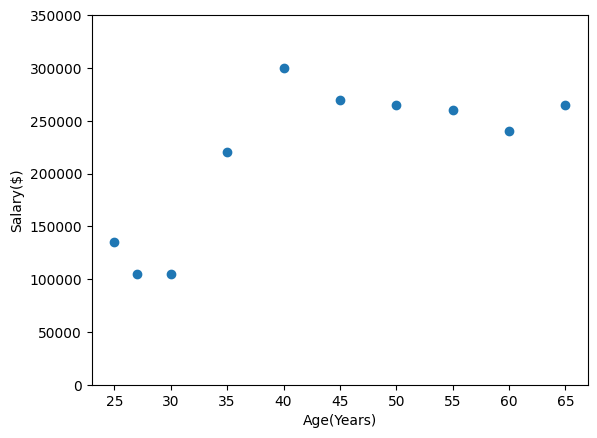

In [3]:
#Scatter plot for data1 (Age vs. Salaray)
plt.scatter(data1['age'],data1['salary']);
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)');
plt.ylim(0,350000)

In [6]:
#Define independent variables for polynomial regressions

data1['age2'] = data1['age'] ** 2
data1['age3'] = data1['age'] ** 3
data1['age4'] = data1['age'] ** 4
data1['age5'] = data1['age'] ** 5
# data1['salary'] = data1[['age2','age3']] # 데이터 2개 이상 넣을때 괄호 더 넣기

data1.head()

,age,salary,age2,age3,age4,age5
0,25,135000,625,15625,390625,9765625
1,55,260000,3025,166375,9150625,503284375
2,27,105000,729,19683,531441,14348907
3,35,220000,1225,42875,1500625,52521875
4,60,240000,3600,216000,12960000,777600000


In [9]:
#Fitting regression models
Xvars2 = data1[['age', 'age2']]
Xvars5 = data1[['age', 'age2', 'age3', 'age4', 'age5']]

Xvars = sm.add_constant(data1['age'])
Xvars2 = sm.add_constant(Xvars2)
Xvars5 = sm.add_constant(Xvars5)

poly_ols1 = regression.linear_model.OLS(data1['salary'], Xvars).fit()
poly_ols2 = regression.linear_model.OLS(data1['salary'], Xvars2).fit()
poly_ols5 = regression.linear_model.OLS(data1['salary'], Xvars5).fit()

In [10]:
# print(poly_ols1.summary())
print(poly_ols2.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     13.89
Date:                Mon, 22 Sep 2025   Prob (F-statistic):            0.00366
Time:                        21:11:53   Log-Likelihood:                -117.68
No. Observations:                  10   AIC:                             241.4
Df Residuals:                       7   BIC:                             242.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.822e+05    1.5e+05     -2.545      0.0

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [11]:
print(poly_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     9.432
Date:                Mon, 22 Sep 2025   Prob (F-statistic):             0.0153
Time:                        21:12:08   Log-Likelihood:                -121.81
No. Observations:                  10   AIC:                             247.6
Df Residuals:                       8   BIC:                             248.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.116e+04   5.64e+04      0.908      0.3

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [9]:
print(poly_ols5.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     25.10
Date:                Mon, 30 Sep 2024   Prob (F-statistic):            0.00405
Time:                        11:04:31   Log-Likelihood:                -108.31
No. Observations:                  10   AIC:                             228.6
Df Residuals:                       4   BIC:                             230.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.92e+07   5.72e+06      3.354      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


(0.0, 350000.0)

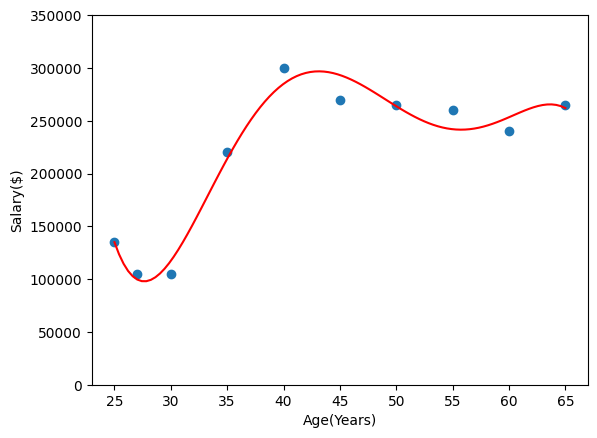

In [10]:
poly5 = np.poly1d(np.polyfit(data1['age'], data1['salary'], 5))
myline = np.linspace(25,65,100)
plt.scatter(data1['age'],data1['salary']);
plt.plot(myline, poly5(myline), 'r');
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)');
plt.ylim(0,350000)

In [12]:
data2 = pd.read_csv(mydata_path + 'age_salary_validation.csv')
data2

,age,salary
0,30,166000
1,26,78000
2,58,310000
3,29,100000
4,40,260000
5,27,150000
6,33,140000
7,61,220000
8,27,86000
9,48,276000


(0.0, 350000.0)

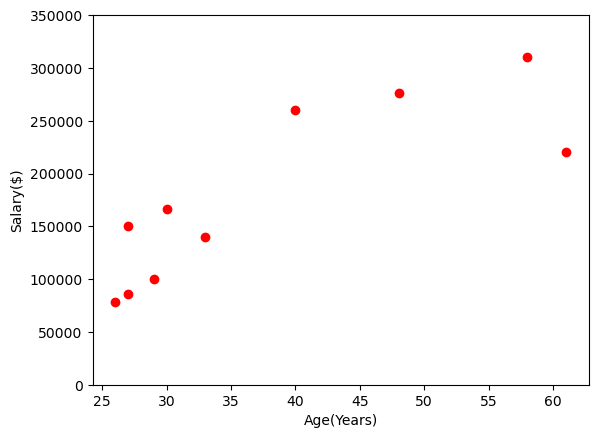

In [13]:
plt.scatter(data2['age'],data2['salary'], color = 'red');
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)');
plt.ylim(0,350000)

Text(0, 0.5, 'Salary($)')

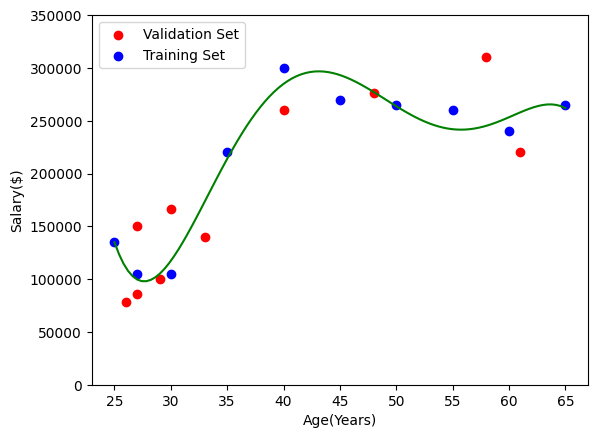

In [ ]:
plt.scatter(data2['age'],data2['salary'], color = 'red', label = 'Validation Set')
plt.scatter(data1['age'],data1['salary'], color = 'blue', label = 'Training Set')
plt.plot(myline, poly5(myline), color = 'green')
plt.ylim(0,350000)
plt.legend()
plt.xlabel('Age(Years)')
plt.ylabel('Salary($)')

(0.0, 350000.0)

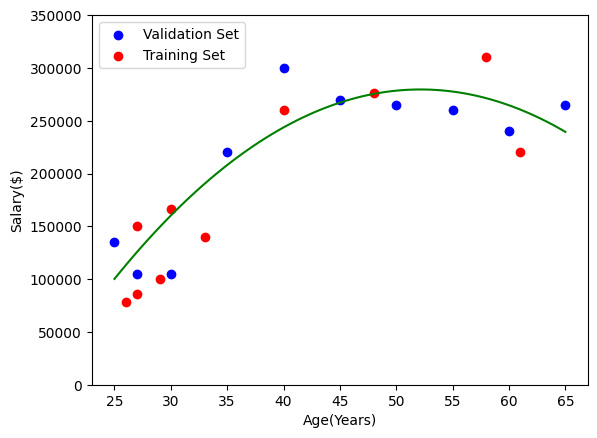

In [ ]:
poly2 = np.poly1d(np.polyfit(data1['age'], data1['salary'], 2))
myline = np.linspace(25,65,100)
plt.scatter(data1['age'],data1['salary'], color = 'blue', label = 'Validation Set');
plt.scatter(data2['age'],data2['salary'], color = 'red', label = 'Training Set');
plt.plot(myline, poly2(myline), color = 'green');
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)');
plt.legend()
plt.ylim(0,350000)

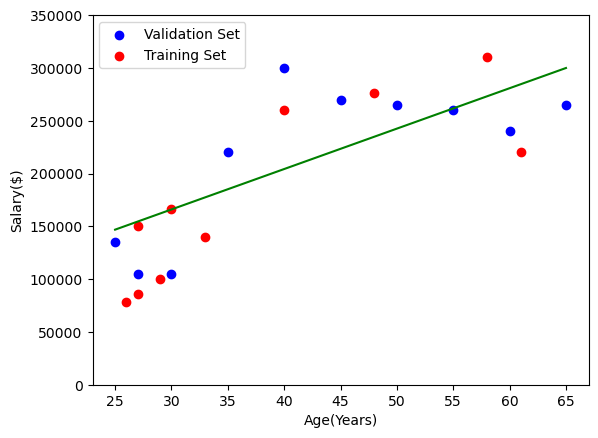

In [14]:
poly1 = np.poly1d(np.polyfit(data1['age'], data1['salary'], 1))
myline = np.linspace(25,65,100)
plt.scatter(data1['age'],data1['salary'], color = 'blue', label = 'Validation Set');
plt.scatter(data2['age'],data2['salary'], color = 'red', label = 'Training Set');
plt.plot(myline, poly1(myline), color = 'green');
plt.xlabel('Age(Years)');
plt.ylabel('Salary($)');
plt.ylim(0,350000)
plt.legend()

In [15]:
data2['age2'] = data2['age'] ** 2
data2['age3'] = data2['age'] ** 3
data2['age4'] = data2['age'] ** 4
data2['age5'] = data2['age'] ** 5

Tvars2 = data2[['age', 'age2']]
Tvars5 = data2[['age', 'age2', 'age3', 'age4', 'age5']]
Tvars = sm.add_constant(data2['age'])
Tvars2 = sm.add_constant(Tvars2)
Tvars5 = sm.add_constant(Tvars5)

data2.head()

,age,salary,age2,age3,age4,age5
0,30,166000,900,27000,810000,24300000
1,26,78000,676,17576,456976,11881376
2,58,310000,3364,195112,11316496,656356768
3,29,100000,841,24389,707281,20511149
4,40,260000,1600,64000,2560000,102400000


In [ ]:
poly1_pred_train = poly_ols1.predict(Xvars)
poly1_pred_valid = poly_ols1.predict(Tvars)

print("MAE for training set with order 1 : {}".format(mean_absolute_error(data1['salary'], poly1_pred_train)))
print("MAE for validation set with order 1 : {}".format(mean_absolute_error(data2['salary'], poly1_pred_valid)))
print("RMSE for training set with order 1: {}".format(rmse(data1['salary'], poly1_pred_train)))
print("RMSE for validation set with order 1: {}".format(rmse(data2['salary'], poly1_pred_valid)))

MAE for training set with order 1 : 39943.29091315025
MAE for validation set with order 1 : 44365.80709979904
RMSE for training set with order 1: 47179.0930704645
RMSE for validation set with order 1: 50590.161790571445


In [ ]:
poly2_pred_train = poly_ols2.predict(Xvars2)
poly2_pred_valid = poly_ols2.predict(Tvars2)

print("MAE for training set with order 2 : {}".format(mean_absolute_error(data1['salary'], poly2_pred_train)))
print("MAE for validation set with order 2 : {}".format(mean_absolute_error(data2['salary'], poly2_pred_valid)))
print("RMSE for training set with order 2: {}".format(rmse(data1['salary'], poly2_pred_train)))
print("RMSE for validation set with order 2: {}".format(rmse(data2['salary'], poly2_pred_valid)))

MAE for training set with order 2 : 26309.982379091998
MAE for validation set with order 2 : 30071.079887264892
RMSE for training set with order 2: 31242.116846903198
RMSE for validation set with order 2: 34348.42820542887


In [ ]:
poly5_pred_train = poly_ols5.predict(Xvars5)
poly5_pred_valid = poly_ols5.predict(Tvars5)

print("MAE for training set with order 5 : {}".format(mean_absolute_error(data1['salary'], poly5_pred_train)))
print("MAE for validation set with order 5 : {}".format(mean_absolute_error(data2['salary'], poly5_pred_valid)))
print("RMSE for training set with order 5: {}".format(rmse(data1['salary'], poly5_pred_train)))
print("RMSE for validation set with order 5: {}".format(rmse(data2['salary'], poly5_pred_valid)))

MAE for training set with order 5 : 9769.269564392045
MAE for validation set with order 5 : 31271.594675704207
RMSE for training set with order 5: 12240.104538048938
RMSE for validation set with order 5: 36832.85178941976


In [ ]:
chk = {'Model':['Linear', 'Quadratic', 'Polynomial5']
       ,'MAE_Train':[mean_absolute_error(data1['salary'], poly1_pred_train),mean_absolute_error(data1['salary'], poly2_pred_train),mean_absolute_error(data1['salary'], poly5_pred_train)]
       , 'MAE_Valid':[mean_absolute_error(data2['salary'], poly1_pred_valid), mean_absolute_error(data2['salary'], poly2_pred_valid), mean_absolute_error(data2['salary'], poly5_pred_valid)]
       , 'RMSE_Train':[rmse(data1['salary'], poly1_pred_train),rmse(data1['salary'], poly2_pred_train),rmse(data1['salary'], poly5_pred_train)]
       , 'RMSE_Valid':[rmse(data2['salary'], poly1_pred_valid),rmse(data2['salary'], poly2_pred_valid),rmse(data2['salary'], poly5_pred_valid)]}

mae_rmse = pd.DataFrame(data = chk)

mae_rmse

,Model,MAE_Train,MAE_Valid,RMSE_Train,RMSE_Valid
0,Linear,39943.290913,44365.807100,47179.093070,50590.161791
1,Quadratic,26309.982379,30071.079887,31242.116847,34348.428205
2,Polynomial5,9769.269564,31271.594676,12240.104538,36832.851789
